# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 3. Обработка данных и визуализация количественных данных


## Часть 1: загрузка и описание данных

В файле `salaries.csv` сохранены данные по сотрудникам университета в США, а именно следующие их характеристики:

* `rank`: должность;
* `discipline`: тип преподаваемой дисциплины (`A` – теоретическая, `B` – практическая);
* `phd`: число лет с момента получения степени PhD;
* `service`: число лет опыта работы;
* `sex`: пол;
* `salary`: заработная плата за 9 месяцев, в долларах.

Импортируем библиотеку `pandas` с сокращённым названием `pd`, которая используется для загрузки и обработки данных в табличном виде:

In [1]:
import pandas as pd

Загрузим сам файл с данными в Google Colab или Jupyter Notebook.

**Пояснение для Google Colab.** Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `read_csv()` для чтения CSV-файла. Например:

    df = pd.read_csv("/content/salaries.csv")

**Пояснение для Jupyter Notebook.** Удобно, если файл с данными при работе лежит в той же папке, что и текущий ipynb-файл, в котором мы запускаем код, так не придется полностью прописывать к нему путь, достаточно одного названия с расширением. Загрузить файл с данными в Jupyter можно через *Upload* на *Home Page* (по аналогии с загрузкой ipynb-файлов). После добавления файла его название с расширением можно вставить в функцию `read_csv()` для чтения CSV-файла. Например:

    df = pd.read_csv("salaries.csv")

Загрузим данные из файла `salaries` и сохраним их в таблицу – датафрейм с назанием `df`.



In [2]:
df = pd.read_csv("salaries.csv")

Посмотрим на датафрейм:

In [3]:
df

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


Можем отдельно вывести на экран первые или последние 5 строк датафрейма, воспользовавшись методами `.head()` и `.tail()` соответственно:

In [4]:
# первые
df.head()

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [5]:
# последние
df.tail()

,Unnamed: 0,rank,discipline,phd,service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


Внутри `.head()` и `.tail()` можно указать желаемое количество строк таблицы, если базовое значение 5 нас не устраивает:

In [6]:
df.head(8)

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765


Посмотрим на переменные и проверим, что все переменные – корректных типов (например, числа считаны как числа, а не как текст):

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  397 non-null    int64 
 1   rank        397 non-null    object
 2   discipline  397 non-null    object
 3   phd         397 non-null    int64 
 4   service     397 non-null    int64 
 5   sex         397 non-null    object
 6   salary      397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


Метод `.info()` возвращает «техническое» описание данных:

* `RangeIndex`: число строк и их индексы;
* `Data columns`: число столбцов;
* `Column`: название столбца;
* `Non-Null Count`: число заполненных – не пустых (`null`) – ячеек в столбце;
* `Dtype`: тип столбца; тип `int` — целочисленный (`integer`), тип `float` — вещественный, может включать в себя как дробные, так и целочисленные значения, тип `object` – строковый, то же что и `string`, то есть текст.

Перейдём к более содержательным вопросам и посмотрим на описательные статистики по всем числовым столбцам:

In [8]:
df.describe() # давайте проинтерпретируем

,Unnamed: 0,phd,service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


Метод `.describe()` возвращает набор основных описательных статистик:

* `count`: число заполненных – непустых – ячеек в столбце;
* `mean`: среднее арифметическое;
* `std`: стандартное отклонение;
* `min`: минимум;
* `max`: максимум;
* `25%`: нижний квартиль;
* `50%`: медиана;
* `75%`: верхний квартиль.

По умолчанию метод `.describe()` выдаёт описание только числовых столбцов, если мы, напротив, хотим описать только текстовые, в качестве аргумента нужно добавить аргумент `include = "object"`, так как текстовый тип в `pandas` называется именно `object`:

In [9]:
df.describe(include = "object") # давайте проинтерпретируем

,rank,discipline,sex
count,397,397,397
unique,3,2,2
top,Prof,B,Male
freq,266,216,358


>В выдаче выше `count` – число заполненных ячеек в столбце, `unique` – число уникальных значений, `top` – мода, самое частое значение, `freq` – частота, соответствующая моде. То есть, например, в нашей выборке больше сотрудников-мужчин, их 358 из 397, по должностям больше всего профессоров, их 266 из 397 (а всего должностей 3, значения `Prof`, `AssocProf` и `AsstProf`).

Иногда для понимания особенностей данных строки в таблице необходимо отсортировать по какому-нибудь показателю. Так, например, отсортировав строки по заработной плате, мы узнаем, какими характеристиками обладают сотрудники, получающие самую низкую/высокую заработную плату. Для сортировки используется метод `.sort_values()`:

In [10]:
# по умолчанию: по возрастанию
df.sort_values("salary")

,Unnamed: 0,rank,discipline,phd,service,sex,salary
282,283,Prof,A,51,51,Male,57800
123,124,AssocProf,A,25,22,Female,62884
237,238,AsstProf,A,7,6,Female,63100
226,227,AsstProf,A,3,1,Male,63900
317,318,Prof,B,46,45,Male,67559
...,...,...,...,...,...,...,...
77,78,Prof,B,26,19,Male,193000
271,272,Prof,A,42,18,Male,194800
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


In [11]:
# ascending = False: по убыванию
df.sort_values("salary", ascending = False)

,Unnamed: 0,rank,discipline,phd,service,sex,salary
43,44,Prof,B,38,38,Male,231545
364,365,Prof,A,43,43,Male,205500
249,250,Prof,A,29,7,Male,204000
271,272,Prof,A,42,18,Male,194800
77,78,Prof,B,26,19,Male,193000
...,...,...,...,...,...,...,...
317,318,Prof,B,46,45,Male,67559
226,227,AsstProf,A,3,1,Male,63900
237,238,AsstProf,A,7,6,Female,63100
123,124,AssocProf,A,25,22,Female,62884


По умолчанию метод `.sort_values()` не изменяет сам датафрейм, Если мы хотим сохранить результат сортировки сразу в датафрейме, можно добавить аргумент `inplace = True`:

In [12]:
# более изящный вариант для df = df.sort_values("salary")
df.sort_values("salary", inplace = True)

При необходимости можно выставить сразу несколько оснований для группировки. Так, если мы отсортируем сотрудников только по опыту работы, мы заметим, что людей с нулевым опытом работы несколько:

In [13]:
df.sort_values("service")

,Unnamed: 0,rank,discipline,phd,service,sex,salary
127,128,AsstProf,A,2,0,Female,72500
154,155,AsstProf,B,4,0,Male,92000
35,36,AsstProf,B,5,0,Female,77000
114,115,Prof,A,12,0,Female,105000
28,29,AsstProf,B,11,0,Male,77000
...,...,...,...,...,...,...,...
350,351,Prof,B,56,49,Male,186960
282,283,Prof,A,51,51,Male,57800
194,195,AssocProf,B,48,53,Male,90000
131,132,Prof,A,56,57,Male,76840


Что мы можем сделать в таком случае? Добавить сортировку по второму основанию: если строк с некоторым значением `service` несколько, среди них производим дополнительную сортировку по `phd`, то есть по числу лет с момента получения степени:

In [14]:
df.sort_values(["service", "phd"])

,Unnamed: 0,rank,discipline,phd,service,sex,salary
157,158,AsstProf,B,1,0,Male,88000
164,165,AsstProf,B,1,0,Male,88795
127,128,AsstProf,A,2,0,Female,72500
13,14,AsstProf,B,2,0,Male,78000
287,288,AsstProf,A,2,0,Male,85000
...,...,...,...,...,...,...,...
350,351,Prof,B,56,49,Male,186960
282,283,Prof,A,51,51,Male,57800
194,195,AssocProf,B,48,53,Male,90000
131,132,Prof,A,56,57,Male,76840


**Дополнение.** Если порядок сортировки разный у каждого основания, например, в примере выше мы хотим отсортировать строки по стажу `service` в порядке возрастания, а по числу лет с момента получения степени `phd` в порядке убывания, то в `ascending` можно вписать список из логических значений:

In [15]:
# True для service
# False для phd

df.sort_values(["service", "phd"], 
               ascending = [True, False])

,Unnamed: 0,rank,discipline,phd,service,sex,salary
114,115,Prof,A,12,0,Female,105000
28,29,AsstProf,B,11,0,Male,77000
308,309,AsstProf,A,5,0,Male,74000
35,36,AsstProf,B,5,0,Female,77000
95,96,AsstProf,B,4,0,Male,84000
...,...,...,...,...,...,...,...
285,286,AssocProf,A,49,49,Male,81800
282,283,Prof,A,51,51,Male,57800
194,195,AssocProf,B,48,53,Male,90000
131,132,Prof,A,56,57,Male,76840


## Часть 2: визуализация данных

Если нам не нужно выполнять какие-то более тонкие настройки графиков, для визуализации достаточно методов на датафреймах `pandas`, без загрузки дополнительной библиотеки `matplotlib`, которая обычно используется для построения графиков. 

Для выбора столбца, который мы собираемся описывать и визуализировать, достаточно указать его название в кавычках в квадратных скобках после названия датафрейма. Проверим это на столбце с заработной платой и методе `.describe()`.

In [16]:
df["salary"].describe()

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64

Для других методов это работает точно так же (названия интуитивные и соответствуют аналогичным функциям в `numpy`):

In [17]:
print(df["salary"].mean())
print(df["salary"].std())

print(df["salary"].median())
print(df["salary"].quantile(0.25))
print(df["salary"].quantile(0.75))

113706.45843828715
30289.038694747822
107300.0
91000.0
134185.0


>В отличие от `numpy`, в библиотеке `pandas` при вычислении выборочного стандартного отклонения с помощью метода `.std()` используется более распространённая формула с $n-1$ в знаменателе (несмещённая оценка), которую мы обсуждали ранее, поэтому здесь аргумент `ddof` не нужен.

Давайте остановимся на этом столбце и построим для него различные графики!

### Задание 1

Постройте для столбца `salary` гистограмму и прокомментируйте распределение заработной платы.

*Подсказка:* метод `.plot()` с аргументом `kind = "hist"`, за цвет заливки отвечает аргумент `color`, за цвет границ столбцов – аргумент `edgecolor`.

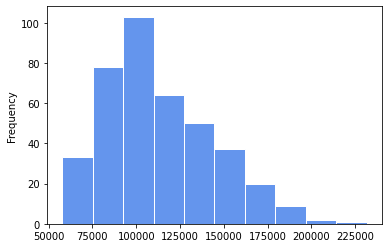

In [18]:
df["salary"].plot(kind = "hist", 
                  color = "cornflowerblue", 
                  edgecolor = "white");

Точку с запятой в конце строки ставить необязательно, если её убрать, помимо графика на экран будет выведена строка с информацией о том, что Python временно создал где-то объект типа *оси с графиком* и добавил туда подпись к оси `y`. Цвета можно добавлять как по названию (список цветов в `matplotlib` можно найти [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html)), так и по коду HEX (копируется вместе с `#`):

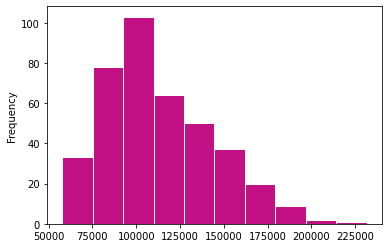

In [19]:
df["salary"].plot(kind = "hist", 
                  color = "#c21184", 
                  edgecolor = "white");

>**Интерпретация.** Распределение заработной платы сотрудников несимметричное, скошено вправо, это означает, что в выборке есть нехарактерно большие значения, то есть люди с очень большой заработной платой. Таких людей мало, собственно, тут есть один человек с суммарной зарплатой в районе 225000$. Также по гистограмме мы можем оценить разброс значений, если посмотрим на горизонтальную ось, отметим, что у нас есть данные по сотрудникам, чья заработная плата не ниже 60000 и не выше 230000 (примерно).

**Дополнительно.** Можем сохранить построенный график в переменную, чтобы затем его доработать.

<class 'matplotlib.axes._subplots.AxesSubplot'>


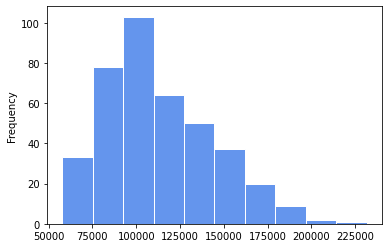

In [20]:
ax = df["salary"].plot(kind = "hist", 
                       color = "cornflowerblue", 
                       edgecolor = "white");
print(type(ax))

В переменной `ax` сейчас хранится объект типа `matplotlib.axes._subplots.AxesSubplot`, оси графика, который строится с помощью графической библиотеки `matplotlib`. Эту библиотеку мы нигде не импортировали, она автоматически подгружается при импорте `pandas`, и `pandas` может использовать оттуда разные функции для визуализации данных из таблицы.

Большинство функций и методов имеют довольно интуитивные названия. Убедимся в этом:

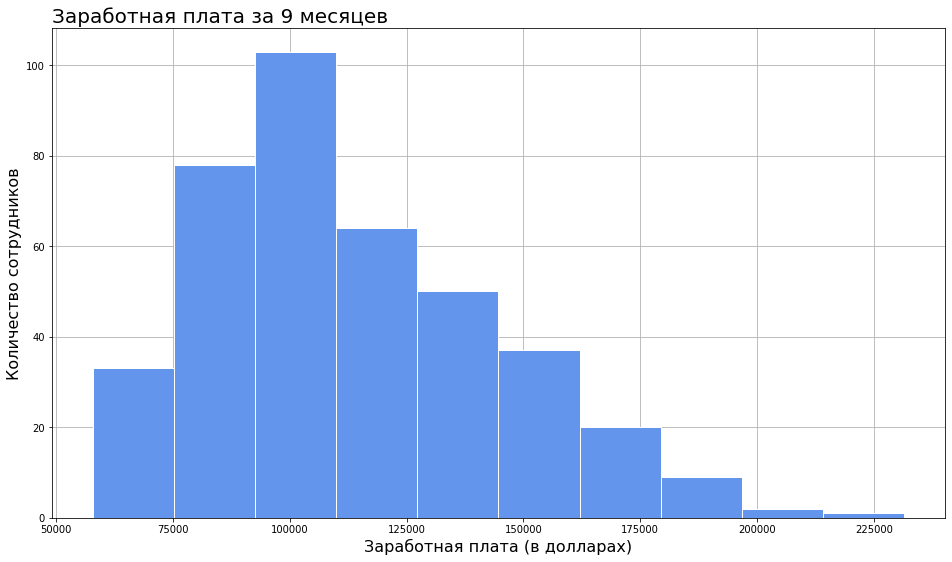

In [21]:
# figsize = (16, 9): размер в дюймах

ax = df["salary"].plot(kind = "hist", 
                       color = "cornflowerblue", 
                       edgecolor = "white",
                       figsize = (16, 9));

# заголовок и подписи к осям
# fontsize – размер шрифта, 
# loc – положение заголовка

ax.set_title("Заработная плата за 9 месяцев", 
             fontsize = 20, loc = "left");
ax.set_xlabel("Заработная плата (в долларах)", fontsize = 16);
ax.set_ylabel("Количество сотрудников", fontsize = 16);

# grid – координатная сетка
# set_axisbelow – отправляем сетку под график,
# чтобы не перекрывала столбцы

ax.grid();
ax.set_axisbelow(True);

### Задание 2

Постройте для столбца `salary` сглаженный график плотности распределения и прокомментируйте полученный график.

*Подсказка:* тот же метод `.plot()` с аргументом `kind = "kde"`.

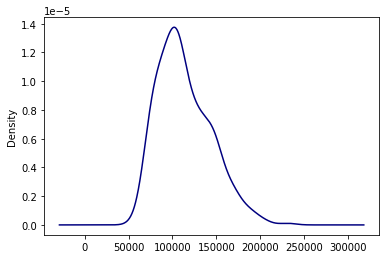

In [22]:
df["salary"].plot(kind = "kde", color = "navy");

>**Интерпретация.** Видим ту же скошенность вправо, так как выборка достаточно большая, проблем с уместностью этого графика нет.

### Задание 3

Постройте для столбца `salary` ящик с усами и прокомментируйте полученный график.

*Подсказка:* тот же метод `.plot()` с аргументом `kind = "box"`.

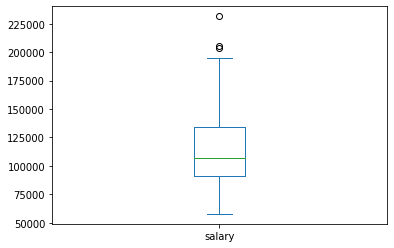

In [23]:
df["salary"].plot(kind = "box");

>**Интерпретация.** По ящику с усами тоже видно, что распределение скошено вправо (медиана не посередине ящика, ближе к нижней границе, верхний ус длинее нижнего). В выборке есть нехарактерные значения заработной платы, это значения от 200000 долларов. Число выбросов – как минимум три, если есть сотрудники с одинаковой заработной платой, значения для разных людей схлопнутся в одну точку. Минимальная заработная плата около 60000 (нижний ус), максимальная среди типичных значений – около 190000. Нижний квартиль примерно 90000, верхний – примерно 130000, медиана – около 110000.

### Задание 4

Постройте графики из заданий 1-3 для опыта работы (стажа в годах), сохранённого в столбце `service`. Прокомментируйте полученные распределения.

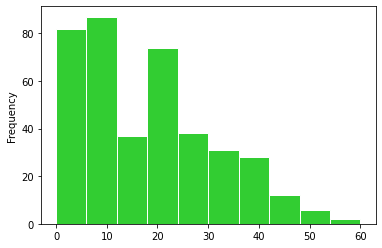

In [24]:
df["service"].plot(kind = "hist", color = "limegreen", 
                       edgecolor = "white");

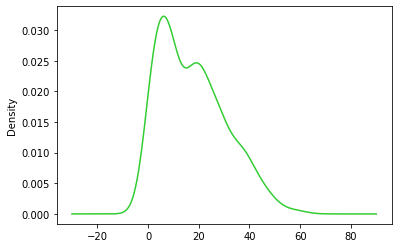

In [25]:
df["service"].plot(kind = "kde", color = "limegreen");

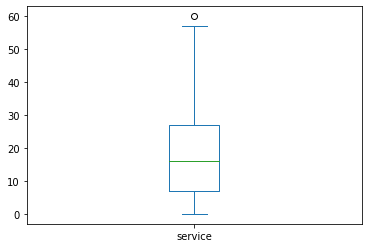

In [26]:
df["service"].plot(kind = "box");

>**Интерпретация.** Распределение опыта работы тоже скошено вправо, при этом в распределении есть два пика, один повыше, другой пониже. Распределение можно считать бимодальным, есть довольно значительная группа сотрудников с опытом работы около 10 лет (более 80 человек), и есть группа с опытом работы 20-25 лет (около 70 человек). Есть один сотрудник с очень нетипично большим опытом работы 60 лет.

## Часть 3: группировка и описание данных

Для того, чтобы описывать данные и строить графики по группам, необязательно отфильтровывать строки, соответствующие каждой группе, в отдельный датафрейм и работать с каждой группой отдельно. Для базового описания достаточно воспользоваться методом `.groupby()`. Внутри этого метода можно вписать название столбца, на основе которого мы выполняем группировку, а затем из результата группировки через квадратные скобки выбрать столбец или столбцы, которые мы хотим описать или как-то обработать. 

Сгруппируем строки в `df` по полу и выведем описательные статистики для заработной платы `salary` в каждой группе:

In [27]:
df.groupby("sex")["salary"].describe() # проинтерпретируем

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,39.0,101002.410256,25952.127317,62884.0,77250.0,103750.0,117002.50,161101.0
Male,358.0,115090.418994,30436.927344,57800.0,92000.0,108043.0,134863.75,231545.0


>В среднем, заработная плата мужчин выше (и среднее, и медиана выше), однако минимальная заработная плата выше у женщин. Более разнообразны значения заработной платы у мужчин – в этой группе выборочное стандартное отклонение выше (30436 против 25952) и гораздо более существенна разница между максимальным и минимальным значением. Среди мужчин точно есть сотрудники с нехарактерно высокой заработной платой, хотя среднее и медиана отличаются не очень сильно (учитывая единицы измерения), максимальное значение превышает верхний квартиль почти на 100 тысяч долларов. При этом стоит отметить, что женщин в выборке довольно мало (всего 39), то есть, если мы еще поделим всех сотрудников на группы, возможно, некоторые группы будут совсем маленькие, что не очень хорошо для последующего статистического анализа.

Как и в случае с сортировкой, оснований для группировки может быть несколько. Сгруппируем строки по типу преподаваемой дисциплины и полу:

In [28]:
df.groupby(["discipline", "sex"])["salary"].describe() # проинтерпретируем

count           mean           std      min      25%  \
discipline sex                                                            
A          Female   18.0   89064.944444  21638.580595  62884.0  73350.0   
           Male    163.0  110699.981595  30663.119265  57800.0  87347.5   
B          Female   21.0  111234.523810  25367.239751  71065.0  97032.0   
           Male    195.0  118760.374359  29831.315448  67559.0  94731.5   

                        50%       75%       max  
discipline sex                                   
A          Female   78000.0  108484.5  137000.0  
           Male    105260.0  127950.0  205500.0  
B          Female  105450.0  127512.0  161101.0  
           Male    113600.0  141318.0  231545.0

>Особенности распределения заработной платы мужчин и женщин мы уже зафиксировали, здесь они тоже наблюдаются. Если сравнивать зарплаты «теоретиков» (преподающих дисциплины типа A) и «практиков» (преподающих дисциплины типа B), заметно, что заработная плата «практиков», в целом, выше. Это объяснимо, практические дисциплины обычно преподаются в небольших группах, а значит, пар для потока студентов проводится больше, что не может не сказаться на нагрузке сотрудника и, как следствие, на зарплате. 

Вместо `.describe()` можно вписать любой метод, который работает на отдельных столбцах и подходит для типа выбранных данных:

In [29]:
df.groupby(["discipline", "sex"])["salary"].mean()

discipline  sex   
A           Female     89064.944444
            Male      110699.981595
B           Female    111234.523810
            Male      118760.374359
Name: salary, dtype: float64

Раз можно описывать данные сразу по группам, сразу по группам можно строить и графики!

### Задание 1

Постройте гистограммы для заработной платы с группировкой по полу – одна гистограмма для сотрудников-женщин, другая – для сотрудников-мужчин. 

*Подсказка:* метод `.hist()`, применяется ко всему датафрейму, внутри указываем название столбца и основание группировки в аргументе `by`.

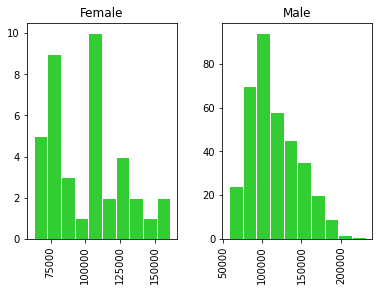

In [30]:
df.hist("salary", by = "sex", 
        color = "limegreen", 
        edgecolor = "white");

>И после деления сотрудников по полу распределение заработной платы в каждой группе остается скошенным вправо (у женщин это менее выражено). Распределение заработной платы у женщин можно считать бимодальным, есть группа женщин с заработной платой в окрестности 110000 долларов и группа женщин, чья зарплата сконцентирована в окрестности 75000 долларов. Также по этим гистограммам можно понять, что число сотрудников женского пола довольно мало, самый высокий столбец в гистограмме имеет высоту 10, то есть интервал самых распространенных значений включает значения заработной платы 10 сотрудников, остальные интервалы – еще меньше.

### Задание 2

Постройте гистограммы для заработной платы с группировкой по типу дисциплины и полу. Всего должно получиться четыре гистограммы.

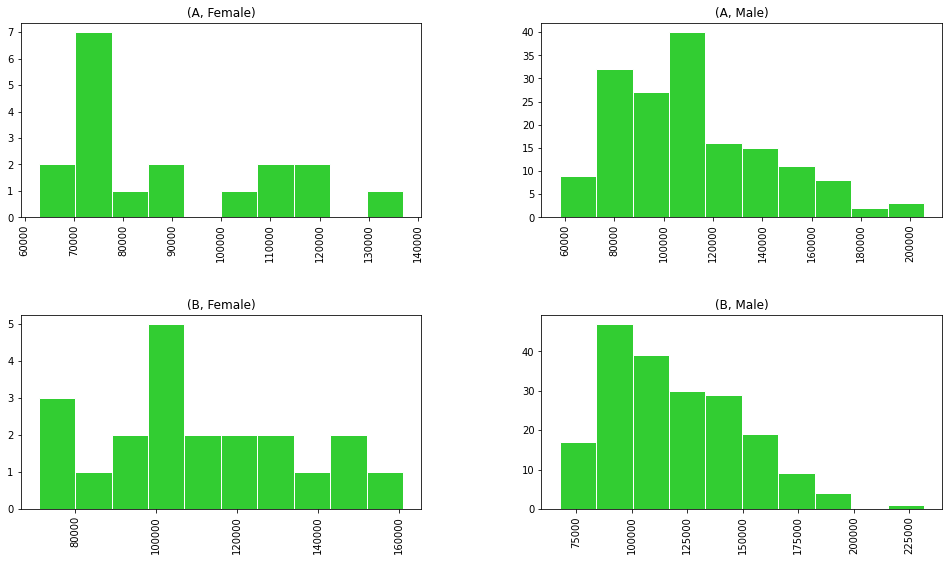

In [31]:
# figsize = (16, 9): размер в дюймах
# если изображение больше, подписи соседних графиков внутри
# не накладываются друг на друга

df.hist("salary", 
        by = ["discipline", "sex"], 
        color = "limegreen", 
        edgecolor = "white",
        figsize = (16, 9));

### Задание 3

Постройте ящики с усами для опыта работы с группировкой по должности.

*Подсказка:* метод `.boxplot()`, применяется ко всему датафрейму, внутри указываем название столбца и основание группировки в аргументе `by`.

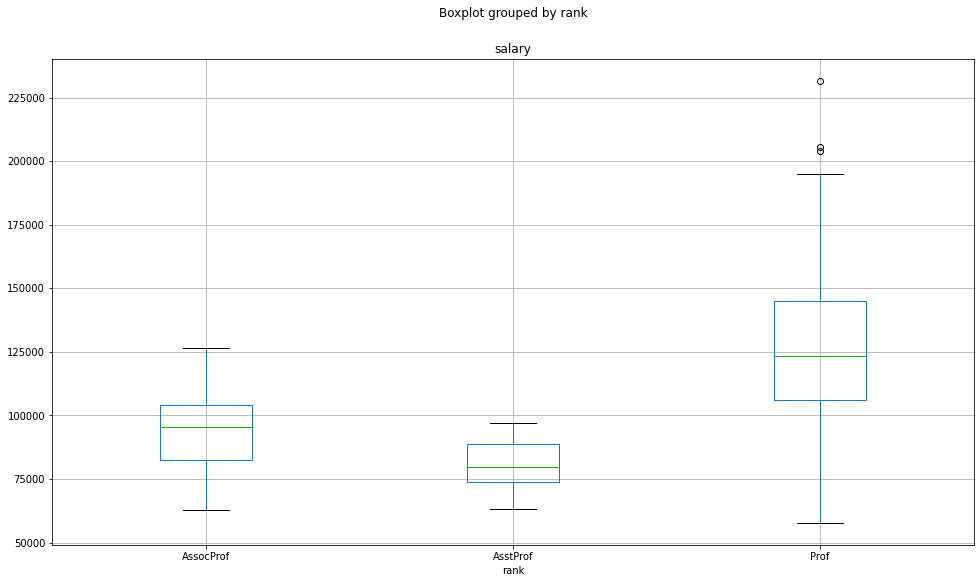

In [32]:
# по должности

df.boxplot("salary", by = "rank", figsize = (16, 9));

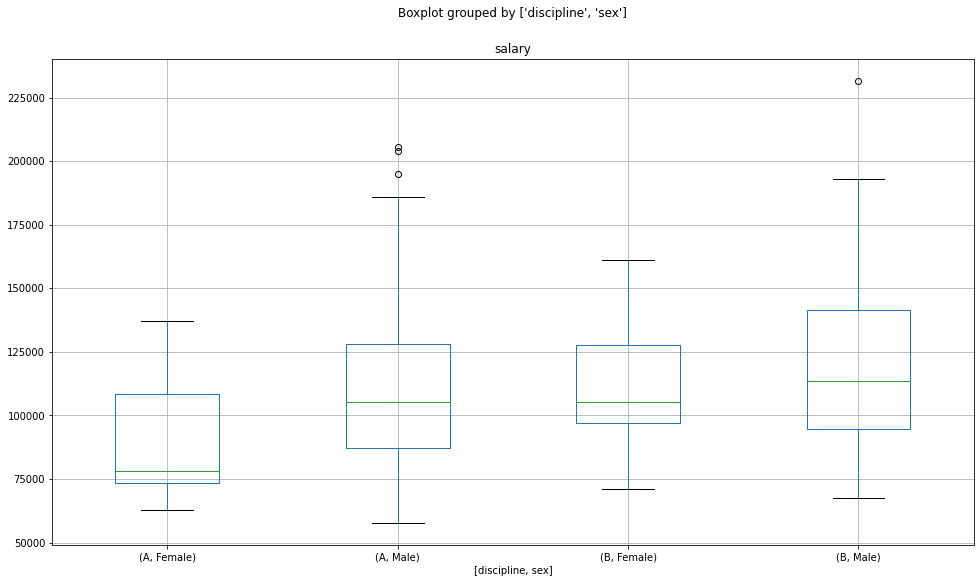

In [33]:
# к предыдущему сюжету, группировка по 
# дисциплине и полу

df.boxplot("salary", 
           by = ["discipline", "sex"],
           figsize = (16, 9));